# 케라스(Keras) 기초부터 모델 생성까지

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png">

- 파이썬으로 작성된 고수준 신경망 API로 TensorFlow, CNTK, 혹은 Theano와 함께 사용 가능
- 사용자 친화성, 모듈성, 확장성을 통해 빠르고 간편한 프로토타이핑 가능
- 컨볼루션 신경망, 순환 신경망, 그리고 둘의 조합까지 모두 지원
- CPU와 GPU에서 매끄럽게 실행

레이어들을 import하는 방식 (1)
- 일일이 import 하지 않아도 됨

- 코드가 다소 길어질 수 있음

레이어들을 import하는 방식 (2)
- 일일이 import 해야함
- 코드가 간결

## 주요 레이어

### Dense
- Fully-Connected Layer

- 노드수(유닛수), 활성화 함수 등을 지정

- name을 통한 레이어간 구분 가능

- 기본적으로  
  'Glorot_uniform' 가중치, zeros bias로 초기화
  - kernel_initializer 인자를 통해 다른 가중치 초기화를 진행할 수 있음

### Activation
- Dense layer에서 미리 활성화함수를 지정할 수도 있지만 때에 따라서 따로 레이어를 만들어줄 수 있음

### Flatten
- 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원으로 쭉 펼치는 작업

- 예시)
        (128, 3, 2, 2) ---> (128, 12)
      

### Input 
- 모델의 입력을 정의

- shape, dtype을 포함

- 하나의 모델은 여러 개의 입력을 가질 수 있음

- summary() 메소드를 통해서는 보이지 않음

## 모델 구성 방법
- Sequential()

- 서브클래싱(Subclassing)

- 함수형 API

### Sequential()

- 모델이 순차적으로 진행할 때 사용

- 간단한 방법
  - Sequential 객체 생성 후, **add**를 통한 방법
  
  - Sequential 인자에 한번에 추가

- 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음


In [1]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model

In [2]:
model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

모델 구조 확인
- model 객체의 **summary()** 이용

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 300)           8700      
                                                                 
 dense_1 (Dense)             (None, 28, 100)           30100     
                                                                 
 dense_2 (Dense)             (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


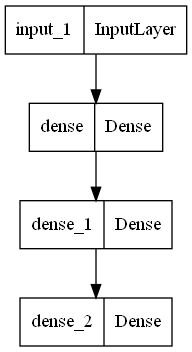

In [4]:
plot_model(model)

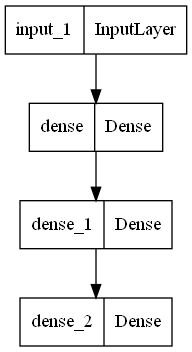

In [6]:
plot_model(model, to_file='model1.png')

In [9]:
model = Sequential([Input(shape=(28,28), name="INput"),
                    Dense(300, activation='relu', name='Dense1'),
                    Dense(100, activation='relu', name='Dense2'),
                    Dense(10, activation='softmax', name='Output')])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 28, 300)           8700      
                                                                 
 Dense2 (Dense)              (None, 28, 100)           30100     
                                                                 
 Output (Dense)              (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


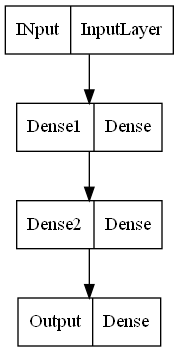

In [11]:
plot_model(model)

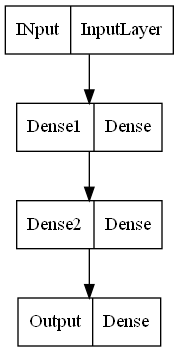

In [12]:
plot_model(model, to_file='model2.png')

### 함수형 API

- 가장 권장되는 방법

- 모델을 복잡하고, 유연하게 구성 가능

- 다중 입출력을 다룰 수 있음

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [21]:
inputs = Input(shape=(28,28))
x = Flatten(input_shape=(28,28,1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)


In [22]:
model = Model(inputs=inputs, outputs=x)

In [23]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


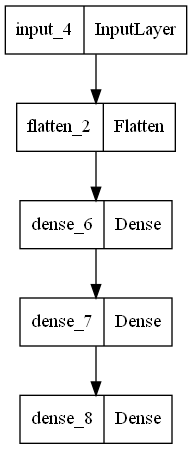

In [24]:
plot_model(model)

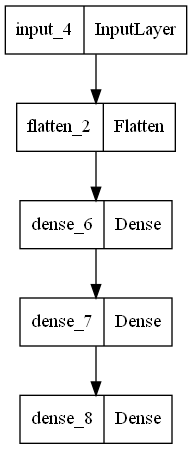

In [25]:
plot_model(model, to_file='model3.png')

In [27]:
from tensorflow.keras.layers import Concatenate

input_layer = Input(shape=(28,28))
hidden1 = Dense(100, activation='relu')(input_layer)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = Concatenate()([input_layer, hidden2])
output = Dense(1)(concat)

model = Model(inputs=[input_layer], outputs=[output])

In [29]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 28, 100)      2900        ['input_5[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 28, 30)       3030        ['dense_9[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 28, 58)       0           ['input_5[0][0]',                
                                                                  'dense_10[0][0]']         

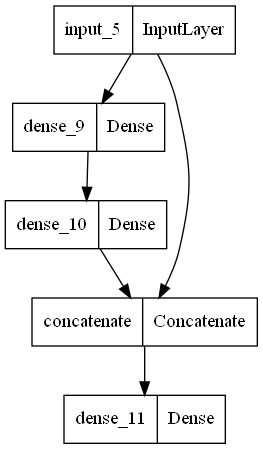

In [30]:
plot_model(model)

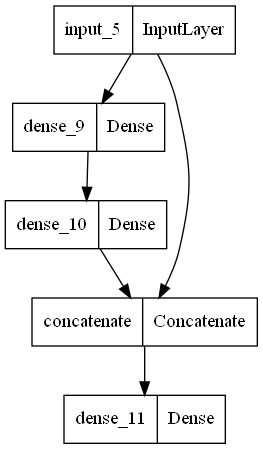

In [31]:
plot_model(model, to_file='model4.png')

In [32]:
input_1 = Input(shape=(10,10), name='input_1')
input_2 = Input(shape=(10,28), name='input_2')

hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)
concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation='sigmoid', name='output')(concat)

model = Model(inputs=[input_1, input_2], outputs=[output])

In [33]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 10, 100)      2900        ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 10, 10)       1010        ['dense_12[0][0]']               
                                                                                            

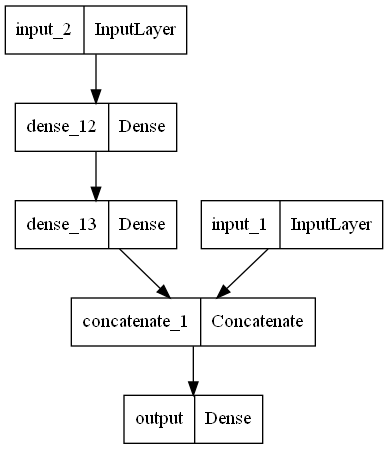

In [34]:
plot_model(model)

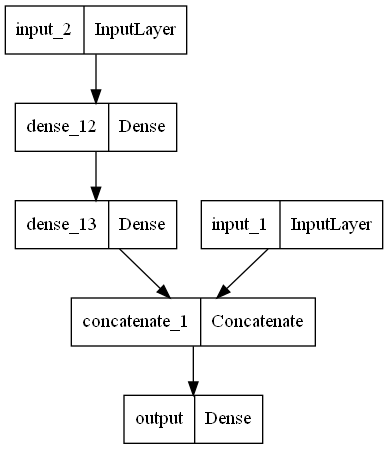

In [35]:
plot_model(model, to_file='model5.png')

In [38]:
input_ = Input(shape=(10,10), name='input_')

hidden1 = Dense(100, activation='relu')(input_)
hidden2 = Dense(10, activation='relu')(hidden1)

output = Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = Dense(1, name='sum_output')(hidden2)

model = Model(inputs=[input_], outputs=[output, sub_out])

In [39]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ (InputLayer)            [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_17 (Dense)               (None, 10, 100)      1100        ['input_[0][0]']                 
                                                                                                  
 dense_18 (Dense)               (None, 10, 10)       1010        ['dense_17[0][0]']               
                                                                                                  
 main_output (Dense)            (None, 10, 1)        11          ['dense_18[0][0]']               
                                                                                            

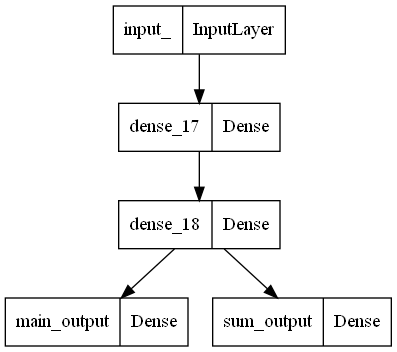

In [40]:
plot_model(model)

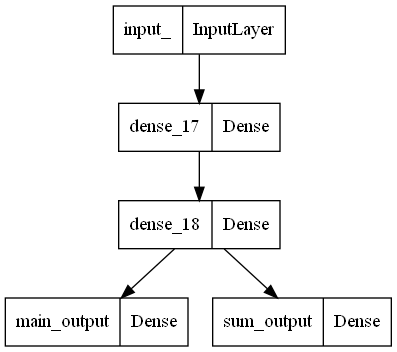

In [41]:
plot_model(model, to_file='model6.png')

In [42]:
input_1 = Input(shape=(10,10), name='input_1')
input_2 = Input(shape=(10,28), name='input_2')

hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)

concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = Dense(1, name='sum_output')(hidden2)

model = Model(inputs=[input_1, input_2], outputs=[output, sub_out])


In [43]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_19 (Dense)               (None, 10, 100)      2900        ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_20 (Dense)               (None, 10, 10)       1010        ['dense_19[0][0]']               
                                                                                            

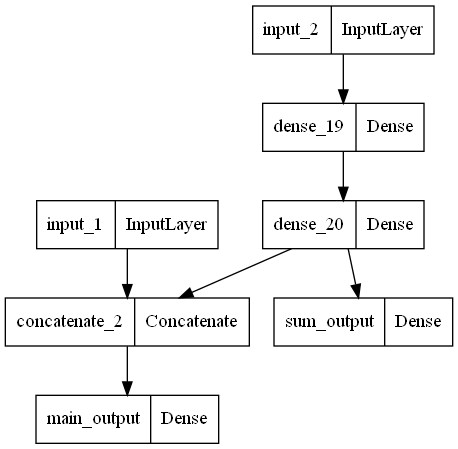

In [44]:
plot_model(model)

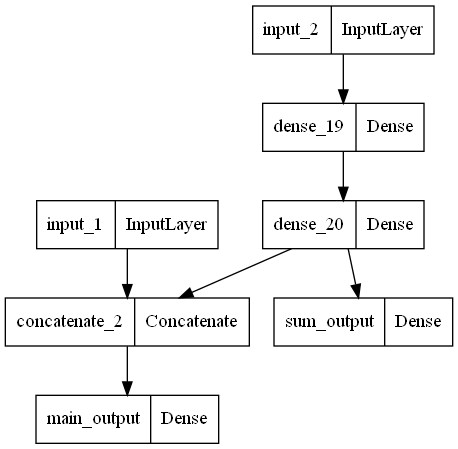

In [45]:
plot_model(model, to_file='model7.png')

### 서브클래싱(Subclassing)
- 커스터마이징에 최적화된 방법

- Model 클래스를 상속받아 Model이 포함하는 기능을 사용할 수 있음  
  - `fit()`, `evaluate()`, `predict()`
  - `save()`, `load()`

- 주로 `call()` 메소드안에서 원하는 계산 가능
  - for, if, 저수준 연산 등

- 권장되는 방법은 아니지만 어떤 모델의 구현 코드를 참고할 때  
  해석할 수 있어야함

## 모델 가중치 확인

모델의 레이어들이 리스트로 표현됨


위의 layer name 참고

## 모델 컴파일(compile)

- 모델을 구성한 후, 사용할 손실함수(loss), 옵티마이저(optimizer)를 지정


### 참고1

#### loss
- `keras.losses.sparse_categorical_crossentropy` 등과 같이 지정 가능
  - `sparse_categorical_crossentropy`  
    클래스가 배타적, 즉 MNIST 예제에서 (0, 1, 2, ..., 9)와 같은 방식으로 구분되어 있을 때 사용

  - `categorical_cross_entropy`
    클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용

  - `binary_crossentropy`
  이진 분류를 수행할 때 사용


#### optimizer
- `keras.optimizer.SGD()` 등과 같이 사용 가능
  - 보통 옵티마이저의 튜닝을 위해 따로 객체를 생성하여 컴파일    
        optimizer = keras.optimizer.SGD(learning_rate=1e-5)  
        model.compile(...,
                      optimizer=optimzer,
                      ...)

- `keras.optimizer.Adam()` 도 많이 사용

#### metrics
- 모니터링할 지표

- 주로 'accuracy', 'acc'로도 가능


### 참고2 - 컴파일 설정 예시
- 평균 제곱 오차 회귀 문제  
      model.compile(loss = 'mse',  
                    optimizer = RMSprop(),  
                    metrics=['mae'])

- 이진 분류
      model.compile(loss = 'binary_crossentropy',  
                    optimizer = RMSprop(),  
                    metrics=['accuracy])



- 다항 분류
      model.compile(loss = 'categorical_crossentropy',  
                    optimizer = RMSprop(),  
                    metrics=['accuracy])
 


## 모델 훈련, 평가 및 예측
- `fit()` 함수

  - train_data(학습 데이터), train_label(데이터의 정답)
  
  - epochs
  
  - batch_size
  
  - validation_data

- `evaluate()` 함수
  - 테스트 데이터


- `predict()`
  임의의 데이터를 인자로 넣어 예측 가능

## MNIST 예제를 통해 모델 구성하기

- keras.datasets 에 포함되어 있는 데이터셋

  <img src="https://storage.googleapis.com/tfds-data/visualization/fig/mnist-3.0.1.png" width="400">

  <sub>출처: https://www.tensorflow.org/datasets/catalog/mnist</sub>

### modules import

### 데이터셋 로드
- MNIST 데이터셋을 로드

- Train Data 중, 30%를 검증 데이터(valiation data)로 사용


### 데이터 확인

### 데이터 전처리
- Normalization

### 모델 구성 (Sequential)

### 모델 컴파일

### 모델 학습
- 모델 시각화를 위해 history라는 변수에 학습 과정을 담음

### 학습 결과 시각화

### 모델 평가 (1)
- evaluate

### 학습된 모델을 통해 값 예측

### 모델 평가 (2)
- 혼동행렬 (Confusion Maxtrix)

### 모델 평가 (3)
- 분류 보고서

## 모델 저장과 복원
- `save()`

- `load_model()`

- (주의)  
  시퀀셜 API, 함수형 API에서는 **모델**의 저장 및 로드기 가능하지만 서브클래싱 방식으로는 할 수 없음  
  
  서브클래싱 방식
      save_weights()
      load_weights()  
  위 두가지를 통해 **모델의 파라미터**만 저장 및 로드


- JSON 형식
  - `model.to_json()` (저장)

  - `tf.keras.models.model_from_json(file_path)` (복원)

- YAML로 직렬화
  - `model.to_yaml()` (저장)

  - `tf.keras.models.model_from_yaml(file_path)` (복원)


## 콜백 (Callbacks)

- `fit()` 함수의 callbacks 매개변수를 사용하여 케라스가 훈련의 시작이나 끝에 호출할 객체 리스트를 지정할 수 있음

- 여러 개 사용 가능

- ModelCheckpoint
  - `tf.keras.callbacks.ModelCheckpoint`
  - 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용

- EarlyStopping
  - `tf.keras.callbacks.EarlyStopping`
  - 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용

- LearningRateSchduler
  - `tf.keras.callbacks.LearningRateSchduler`
  - 최적화를 하는 동안 학습률(learning_rate)를 동적으로 변경할 때 사용

- TensorBoard
  - `tf.keras.callbacks.TensorBoard`
  - 모델의 경과를 모니터링할 때 사용


### ModelCheckpoint

최상의 모델만을 저장
- save_best_only=True

### EarlyStopping
- 일정 에포크(patience) 동안 검증 세트에 대한 점수가 오르지 않으면 학습을 멈춤

- 모델이 향상되지 않으면 학습이 자동으로 중지되므로,  
  에포크(epochs) 숫자를 크게 해도 무방

- 학습이 끝난 후의 최상의 가중치를 복원하기 때문에 모델을 따로 복원할 필요없음

### LearningRateScheduler

### Tensorboard
- 텐서보드를 이용하여 학습과정 모니터링

텐서보드를 사용하기 위해 logs폴더를 만들고, 학습이 진행되는 동안 로그 파일을 생성

load하는데 시간 소요

- load가 안된다면 port번호를 바꿔서 실행!  
  ex) %tensorboard --logdir {log_dir} port 8000